In [31]:
import pandas
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import layers, models
import pickle
import numpy as np
from keras.utils import to_categorical

In [32]:
# function to load a single batch
def load_batch(file_path):
    with open(file_path, 'rb') as file:
        batch = pickle.load(file, encoding='bytes')
        data = batch[b'data']  # Image data
        labels = batch[b'labels']  # Labels
        return data, labels


In [33]:
def train(batchname, testbatch):
    # load x training data and y training data
    x_train = []
    y_train = []


    for i in range(1, 6):
        file_path = f"path/cifar-10-batches-py/data_batch_{i}"
        data, labels = load_batch(file_path)
        x_train.append(data)
        y_train += labels

    x_train = np.concatenate(x_train)  # combine all batches into a single array
    y_train = np.array(y_train)

    # load test data
    x_test, y_test = load_batch(testbatch)
    x_test = np.array(x_test)
    y_test = np.array(y_test)

    # reshape data
    x_train = x_train.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1).astype("float32")  # Convert to (N, 32, 32, 3)
    x_test = x_test.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1).astype("float32")

    # normalize pixel values to [0, 1]
    x_train /= 255.0
    x_test /= 255.0

    # convert y_train and y_train to one-hot encoded vectors
    y_train = to_categorical(y_train, 10)
    y_test = to_categorical(y_test, 10)

    return x_train, y_train, x_test, y_test, labels

In [34]:
model = models.Sequential([
    # first Convolutional Block
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # second Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # third Convolutional Block
    layers.Conv2D(128, (3, 3), activation='relu'),

    # flatten and fully Connected Layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Dropout for regularization
    layers.Dense(10, activation='softmax')  # 10 classes in CIFAR-10
])

In [35]:
def compile_model(model):
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

def train_model(model, x_train, y_train, x_test, y_test):
    history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))
    return history

In [36]:
def training_history(history):
    # plot accuracy
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # plot loss
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [37]:
training_files = "path/cifar-10-batches-py/data_batch_"
testing_file = "path/cifar-10-batches-py/test_batch"

x_train, y_train, x_test, y_test, labels = train(training_files, testing_file)


In [38]:
# function to vizualize the images in the data set using matplotlib

def see_image(x_train, y_train, labels, image_num):
    # Select the 3rd image and its corresponding label (0-indexed, so this is the 4th image)
    image = x_train[image_num]
    label = y_train[image_num]  

    # get the class index from the one-hot encoded label using np.argmax
    class_index = np.argmax(label)

    plt.imshow(image)  # display the image
    plt.title(f"{labels[class_index]}")  # use the class index to fetch the correct label
    plt.axis('off')  # hide axis
    plt.show()


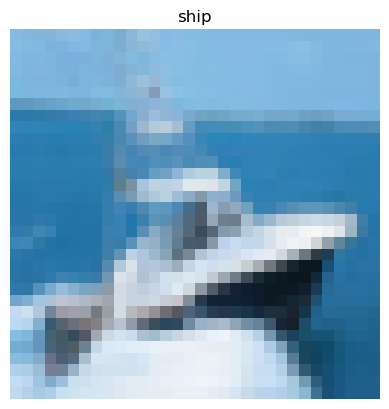

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.3031 - loss: 1.8724 - val_accuracy: 0.5016 - val_loss: 1.3494
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.5176 - loss: 1.3528 - val_accuracy: 0.5984 - val_loss: 1.1302
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.5821 - loss: 1.1908 - val_accuracy: 0.6181 - val_loss: 1.0905
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.6314 - loss: 1.0602 - val_accuracy: 0.6288 - val_loss: 1.0537
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.6598 - loss: 0.9653 - val_accuracy: 0.6885 - val_loss: 0.8904


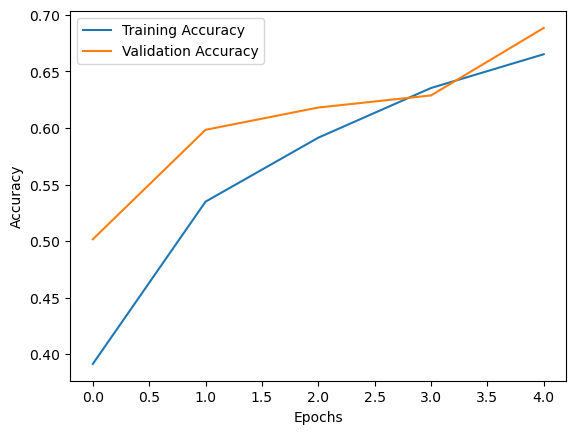

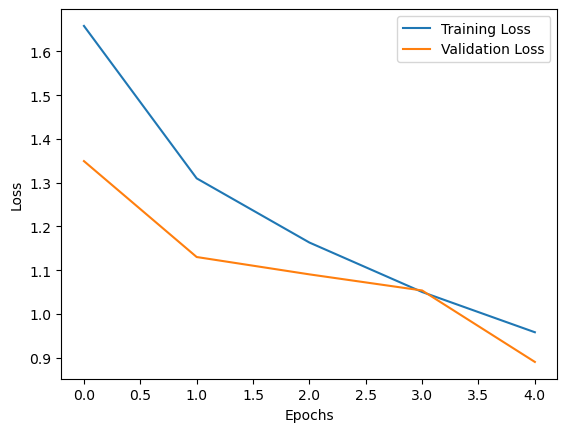

In [39]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']  # the actual labels


see_image(x_train, y_train, labels, 8)

compile_model(model)
history = train_model(model, x_train, y_train, x_test, y_test)
training_history(history)


In [40]:
# check if the data arrays have the correct shapes
print(f"x_train shape: {x_train.shape}") 
print(f"y_train shape: {y_train.shape}") 

print(f"x_test shape: {x_test.shape}")   
print(f"y_test shape: {y_test.shape}")   

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 10)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 10)


In [41]:
x_train.shape[0]

50000